In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [2]:
data = pd.read_csv(r'C:\Users\acer\Documents\retail_shipping_data.csv')
data.head()  

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,Large,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,Large,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,SMediumall,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,Medium,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,Medium,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


## Checking Null Values

In [3]:
data.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

## Plotting

C:\Users\acer\AppData\Local\Temp\ipykernel_12640\3893192081.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Binned Rating', data=df, order=labels, ax=axs[0], palette='viridis')


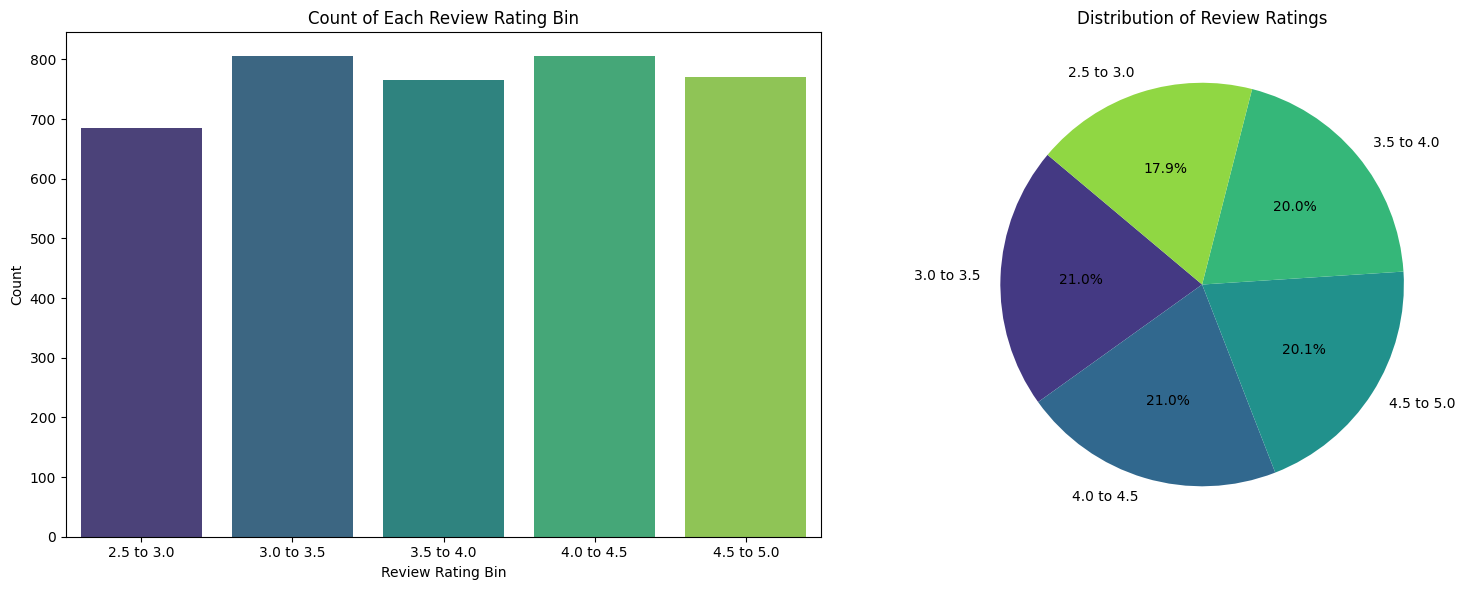

In [3]:

df = pd.DataFrame(data)
bins = [2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
labels = ['2.5 to 3.0', '3.0 to 3.5', '3.5 to 4.0', '4.0 to 4.5', '4.5 to 5.0']


df['Binned Rating'] = pd.cut(df['Review Rating'], bins=bins, labels=labels, right=False)
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
sns.countplot(x='Binned Rating', data=df, order=labels, ax=axs[0], palette='viridis')
axs[0].set_title('Count of Each Review Rating Bin')
axs[0].set_xlabel('Review Rating Bin')
axs[0].set_ylabel('Count')
rating_counts = df['Binned Rating'].value_counts()
rating_labels = rating_counts.index
rating_sizes = rating_counts.values

axs[1].pie(rating_sizes, labels=rating_labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(rating_labels)))
axs[1].set_title('Distribution of Review Ratings')
plt.tight_layout()
plt.show()

##
The most frequent review rating bin is 4.0 to 4.5, with a count of 2.00.
The second most frequent bin is 3.5 to 4.0 and 4.5 to 5.0, both with a count of 1.75.
The least frequent bin is 2.5 to 3.0, with a count of 1.00.
The distribution of review ratings is relatively skewed towards higher ratings, with a significant portion of reviews falling within the 3.5 to 5.0 range.

C:\Users\acer\AppData\Local\Temp\ipykernel_8224\986476572.py:14: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\acer\AppData\Local\Temp\ipykernel_8224\986476572.py:24: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\acer\AppData\Local\Temp\ipykernel_8224\986476572.py:34: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\acer\AppData\Local\Temp\ipykernel_8224\986476572.py:44: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\acer\AppData\Local\Temp\ipykernel_8224\986476572.py:54: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



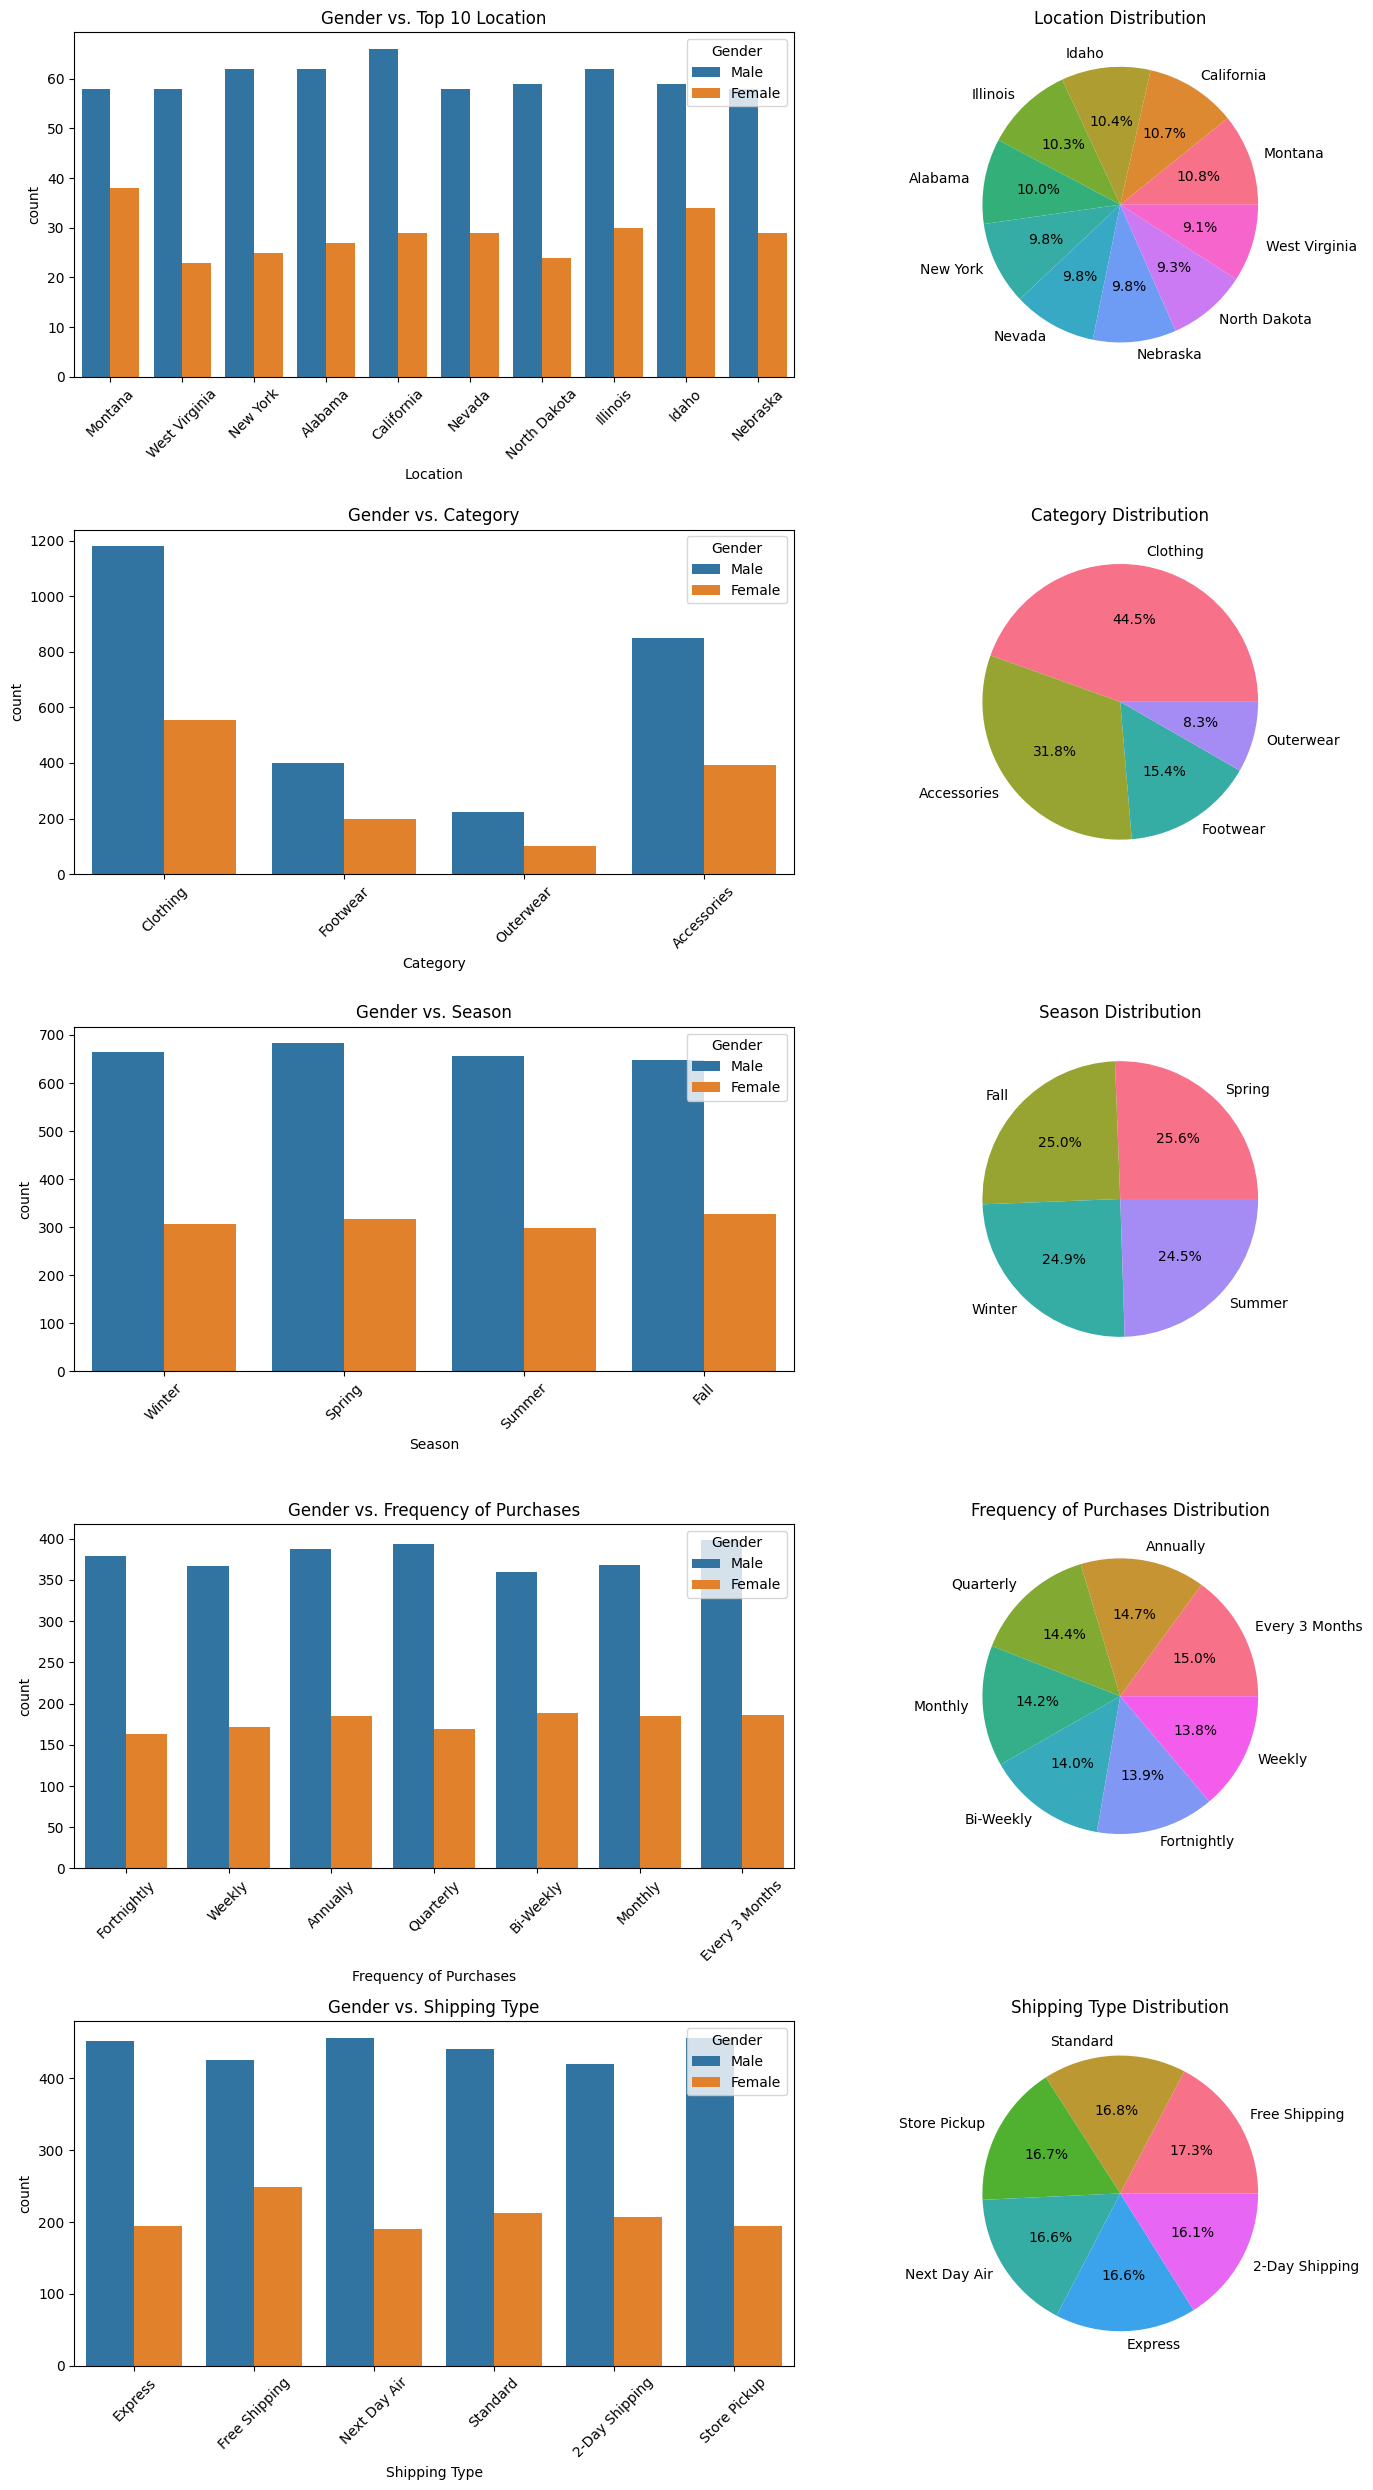

In [132]:
import pandas as pd
import seaborn as sns

df = pd.DataFrame(data)
fig, axes = plt.subplots(5, 2, figsize=(15, 25))
top_locations = df.groupby('Location')['Purchase Amount (USD)'].sum().nlargest(10).index
top_location_df = df[df['Location'].isin(top_locations)]
sns.countplot(data=top_location_df, x='Location', hue='Gender', ax=axes[0, 0])
axes[0, 0].set_title('Gender vs. Top 10 Location')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45)

# Pie chart for Location
location_counts = top_location_df['Location'].value_counts()
axes[0, 1].pie(location_counts, labels=location_counts.index, autopct='%1.1f%%', colors=sns.color_palette('husl', len(location_counts)))
axes[0, 1].set_title('Location Distribution')
sns.countplot(data=df, x='Category', hue='Gender', ax=axes[1, 0])
axes[1, 0].set_title('Gender vs. Category')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45)

category_counts = df['Category'].value_counts()
axes[1, 1].pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', colors=sns.color_palette('husl', len(category_counts)))
axes[1, 1].set_title('Category Distribution')

sns.countplot(data=df, x='Season', hue='Gender', ax=axes[2, 0])
axes[2, 0].set_title('Gender vs. Season')
axes[2, 0].set_xticklabels(axes[2, 0].get_xticklabels(), rotation=45)

season_counts = df['Season'].value_counts()
axes[2, 1].pie(season_counts, labels=season_counts.index, autopct='%1.1f%%', colors=sns.color_palette('husl', len(season_counts)))
axes[2, 1].set_title('Season Distribution')

sns.countplot(data=df, x='Frequency of Purchases', hue='Gender', ax=axes[3, 0])
axes[3, 0].set_title('Gender vs. Frequency of Purchases')
axes[3, 0].set_xticklabels(axes[3, 0].get_xticklabels(), rotation=45)

frequency_counts = df['Frequency of Purchases'].value_counts()
axes[3, 1].pie(frequency_counts, labels=frequency_counts.index, autopct='%1.1f%%', colors=sns.color_palette('husl', len(frequency_counts)))
axes[3, 1].set_title('Frequency of Purchases Distribution')

sns.countplot(data=df, x='Shipping Type', hue='Gender', ax=axes[4, 0])
axes[4, 0].set_title('Gender vs. Shipping Type')
axes[4, 0].set_xticklabels(axes[4, 0].get_xticklabels(), rotation=45)

shipping_counts = df['Shipping Type'].value_counts()
axes[4, 1].pie(shipping_counts, labels=shipping_counts.index, autopct='%1.1f%%', colors=sns.color_palette('husl', len(shipping_counts)))
axes[4, 1].set_title('Shipping Type Distribution')
plt.tight_layout()
plt.show()


## 
The location with the highest count of individuals is Montana, followed by West Virginia and Alabama.
The distribution of genders within each location is relatively balanced, with no significant gender bias observed.The most popular product category is Clothing, followed by Accessories.
Footwear and Outerwear have significantly lower purchase counts compared to Clothing and Accessories.
There is a notable gender difference in purchasing preferences:
Males tend to purchase more Clothing and Footwear.
Females show a higher preference for Accessories.
Outerwear appears to be a relatively gender-neutral category.
The pie chart reinforces the dominance of Clothing and Accessories in the overall product distribution.The most popular season for purchases is Winter, followed by Spring and Fall.
Summer has the lowest purchase count.
There is a slight gender difference in purchasing behavior:
Males tend to purchase slightly more in Winter and Fall.
Females show a slightly higher preference for Spring and Summer.
The pie chart reinforces the dominance of Winter as the most popular season.The most frequent purchase frequency is Weekly, followed by Fortnightly and Annually.
Quarterly, Bi-Weekly, Monthly, and Every 3 Months have significantly lower purchase counts.
There is a notable gender difference in purchase frequency:
Males tend to purchase more Weekly and Fortnightly.
Females show a slightly higher preference for Annually and Quarterly.The most popular shipping type is Standard, followed by Express.
Free Shipping, Next Day Air, 2-Day Shipping, and Store Pickup have significantly lower order counts.
There is a notable gender difference in shipping type preferences:
Males tend to choose Express and Standard more often.
Females show a slightly higher preference for Free Shipping and Store Pickup.

C:\Users\acer\AppData\Local\Temp\ipykernel_8224\4153378854.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, ax=axs[0], palette=count_plot_colors)


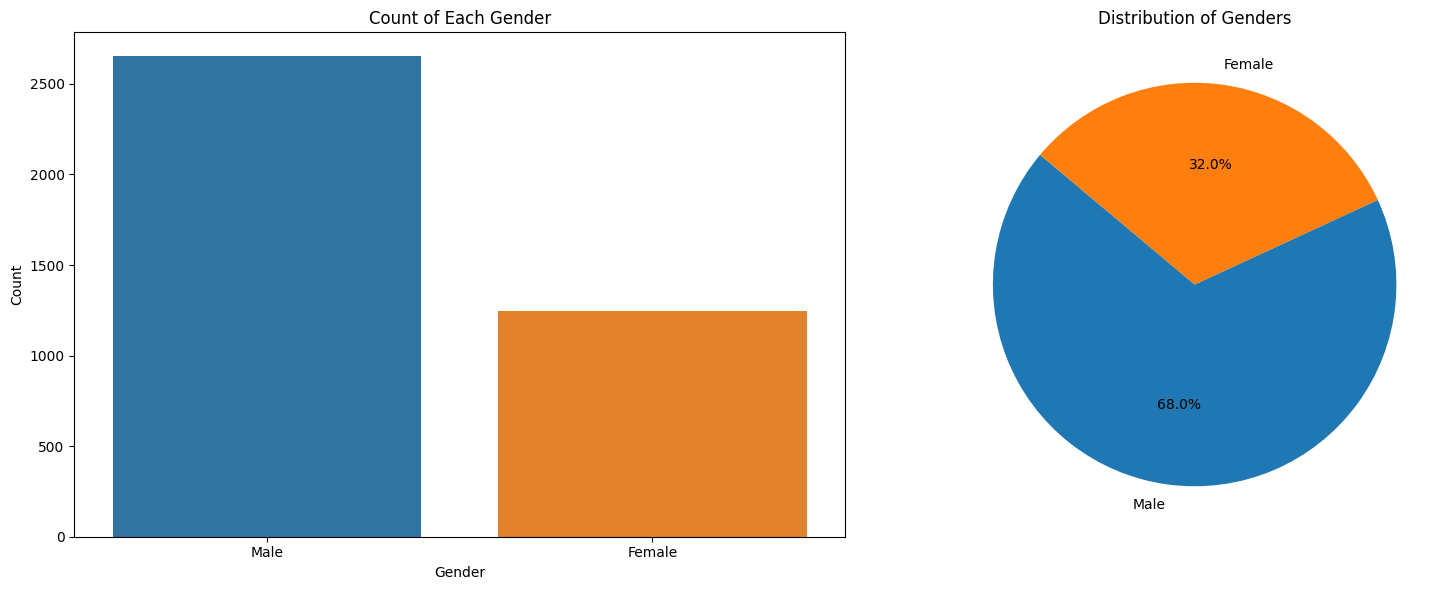

In [8]:
df = pd.DataFrame(data)
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
count_plot_colors = ['#1f77b4', '#ff7f0e'] 
pie_chart_colors = ['#1f77b4', '#ff7f0e']   
sns.countplot(x='Gender', data=df, ax=axs[0], palette=count_plot_colors)
axs[0].set_title('Count of Each Gender')
axs[0].set_xlabel('Gender')
axs[0].set_ylabel('Count')

gender_counts = df['Gender'].value_counts()
gender_labels = gender_counts.index
gender_sizes = gender_counts.values
axs[1].pie(gender_sizes, labels=gender_labels, autopct='%1.1f%%', startangle=140, colors=pie_chart_colors)
axs[1].set_title('Distribution of Genders')
plt.tight_layout()
plt.show()

## 
The majority of individuals are Male, with a count of 2500.
The count of Female individuals is 1250.
The pie chart shows that 68.0% of the population is male, while 32.0% is female.

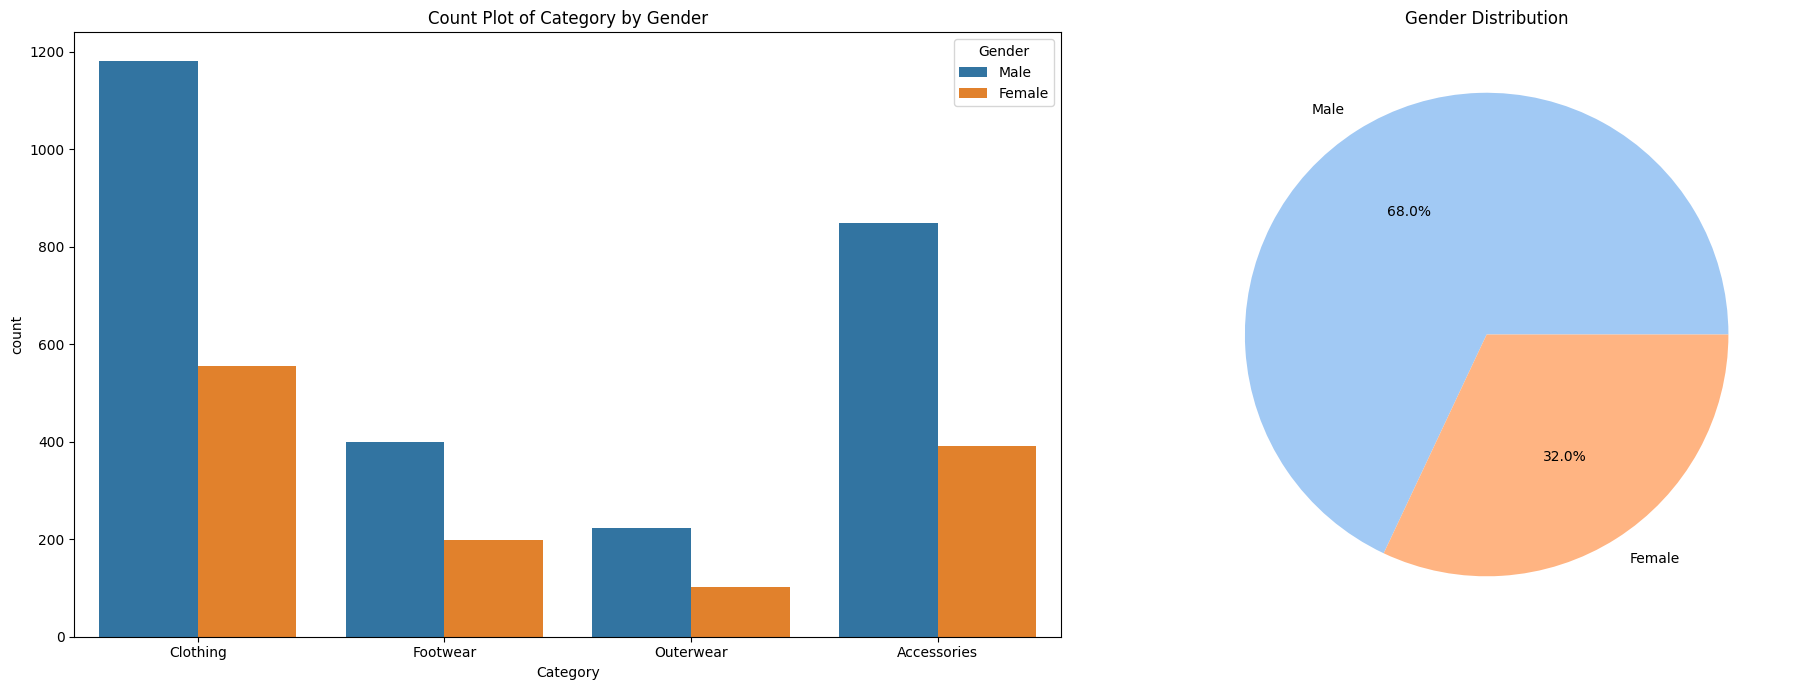

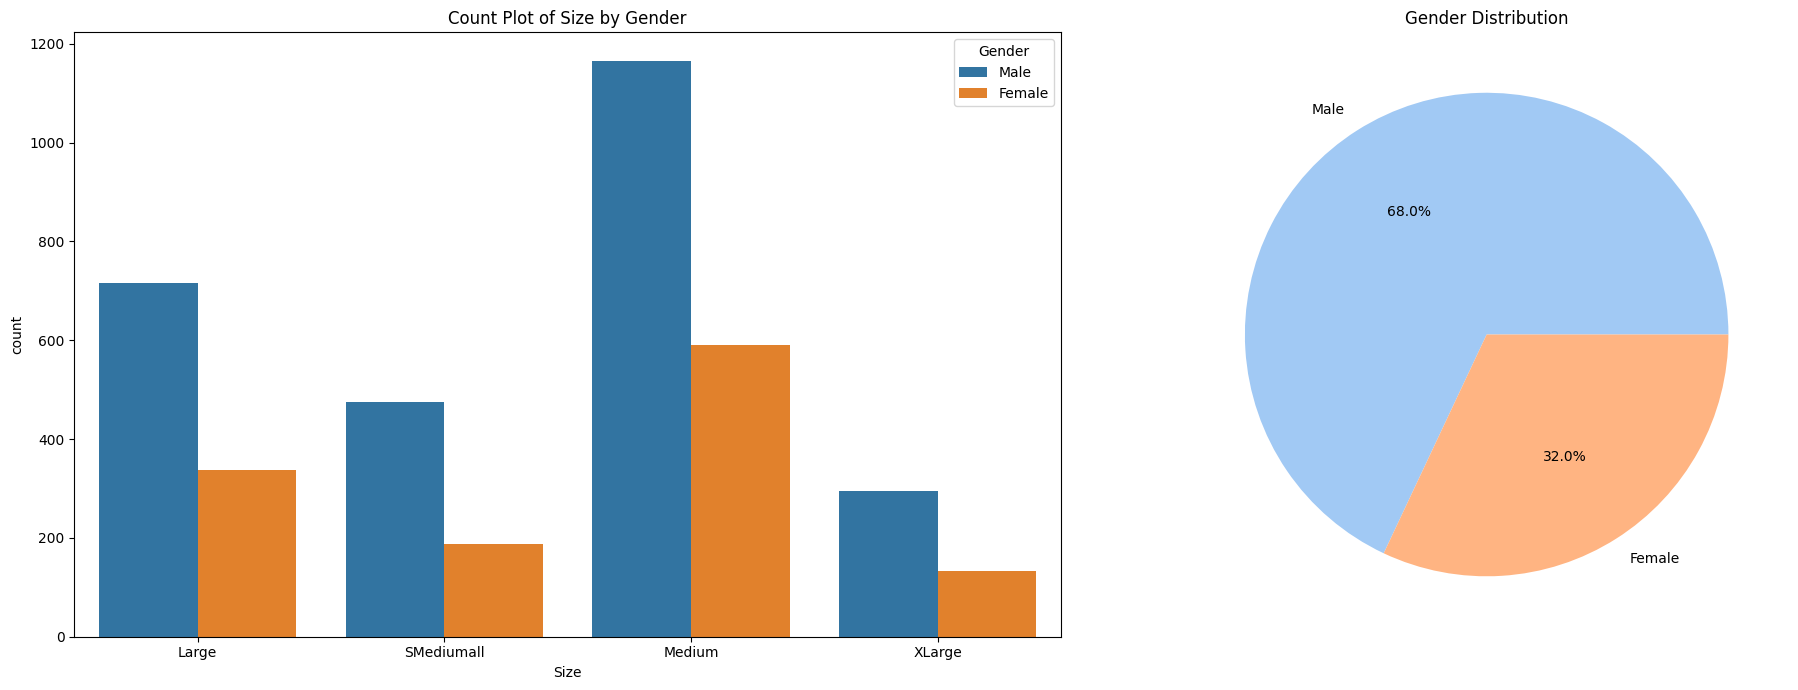

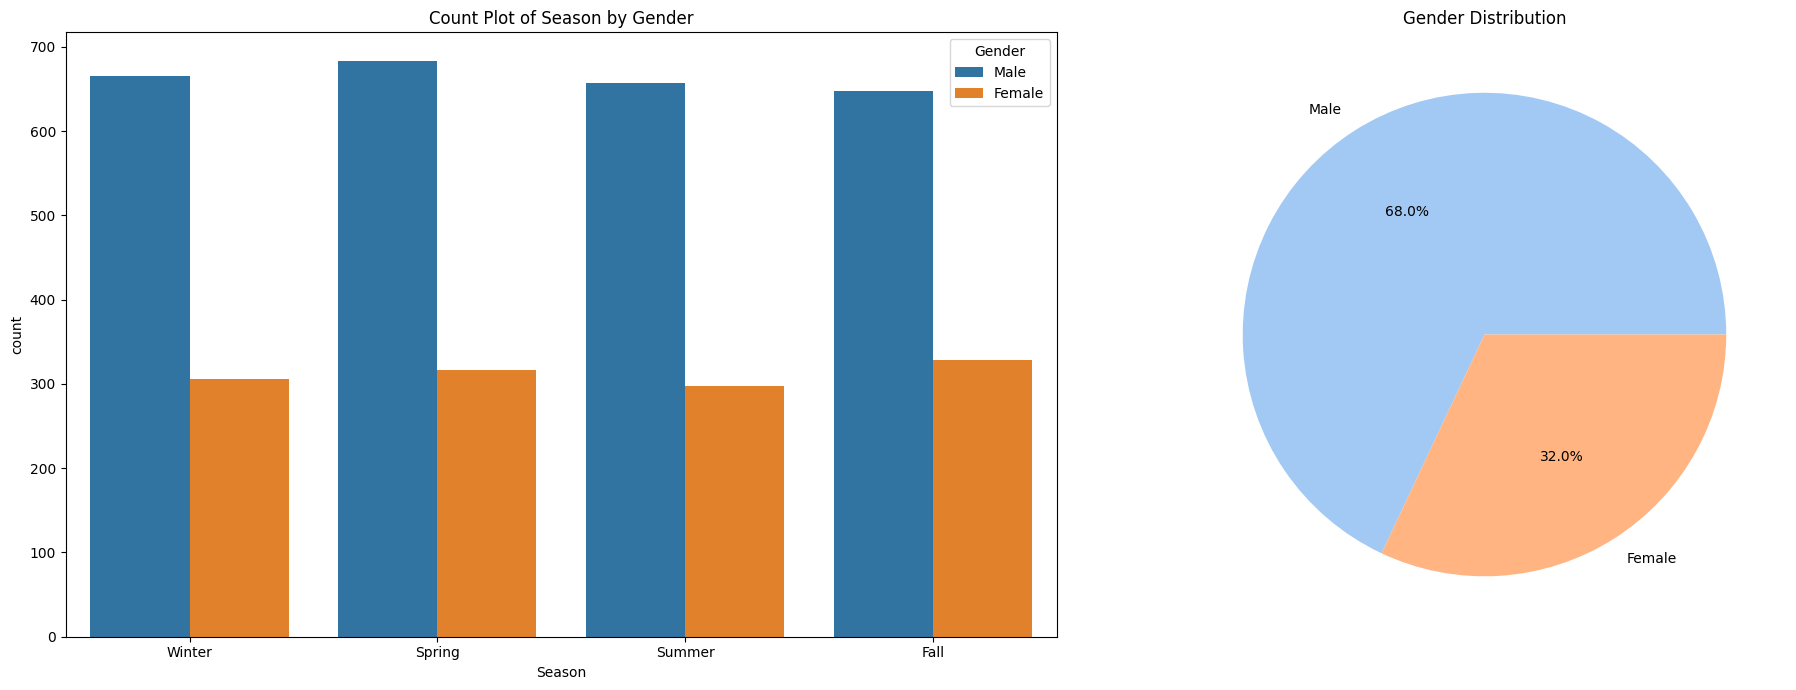

In [5]:


def plot_count_with_pie(data, cat_column, gender_column):
    plt.figure(figsize=(20, 7))
    
    plt.subplot(1, 2, 1)
    sns.countplot(data=data, x=cat_column, hue=gender_column)
    plt.title(f'Count Plot of {cat_column} by Gender')
   
    plt.subplot(1, 2, 2)
    gender_counts = data[gender_column].value_counts()
    plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=sns.color_palette("pastel"))
    plt.title(f'Gender Distribution')
    plt.tight_layout()
    plt.show()

plot_count_with_pie(df, 'Category', 'Gender')
plot_count_with_pie(df, 'Size', 'Gender')
plot_count_with_pie(df, 'Season', 'Gender')


The most popular product category is Clothing, followed by Accessories.
Footwear and Outerwear have significantly lower purchase counts compared to Clothing and Accessories.The most popular size is Medium, followed by Large.
Small and XLarge have significantly lower purchase counts compared to Medium and Large.
There is a notable gender difference in size preferences:
Males tend to purchase more Large and Medium sizes.
Females show a higher preference for Small and XLarge sizes.The most popular season for purchases is Winter, followed by Spring and Fall.
Summer has the lowest purchase count.

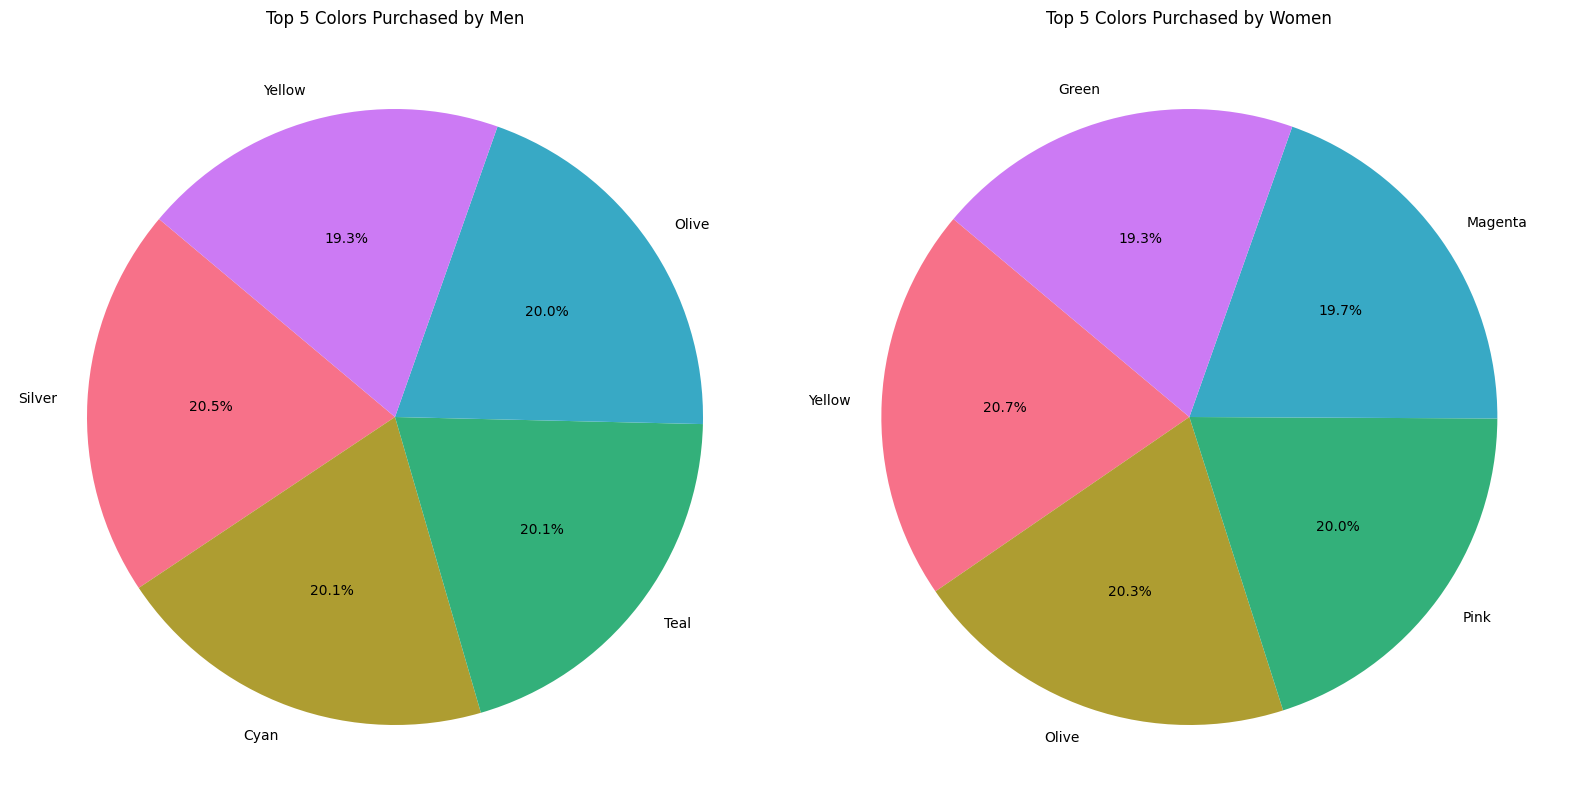

In [19]:


df = pd.DataFrame(data)

top_n = 5
color_counts = df.groupby(['Gender', 'Color']).size().reset_index(name='count')
top_colors_men = color_counts[color_counts['Gender'] == 'Male'].nlargest(top_n, 'count')
top_colors_women = color_counts[color_counts['Gender'] == 'Female'].nlargest(top_n, 'count')
fig, axs = plt.subplots(1, 2, figsize=(16, 8))
colors_palette = sns.color_palette("husl", top_n) 

axs[0].pie(top_colors_men['count'], labels=top_colors_men['Color'], autopct='%1.1f%%', startangle=140, colors=colors_palette)
axs[0].set_title('Top 5 Colors Purchased by Men')

axs[1].pie(top_colors_women['count'], labels=top_colors_women['Color'], autopct='%1.1f%%', startangle=140, colors=colors_palette)
axs[1].set_title('Top 5 Colors Purchased by Women')
plt.tight_layout()
plt.show()


Men: The top 5 colors purchased by men are Silver, Yellow, Olive, Teal, and Cyan. Silver is the most popular color, followed by Yellow and Olive.
Women: The top 5 colors purchased by women are Green, Magenta, Yellow, Olive, and Pink. Green is the most popular color, followed by Magenta and Yellow.

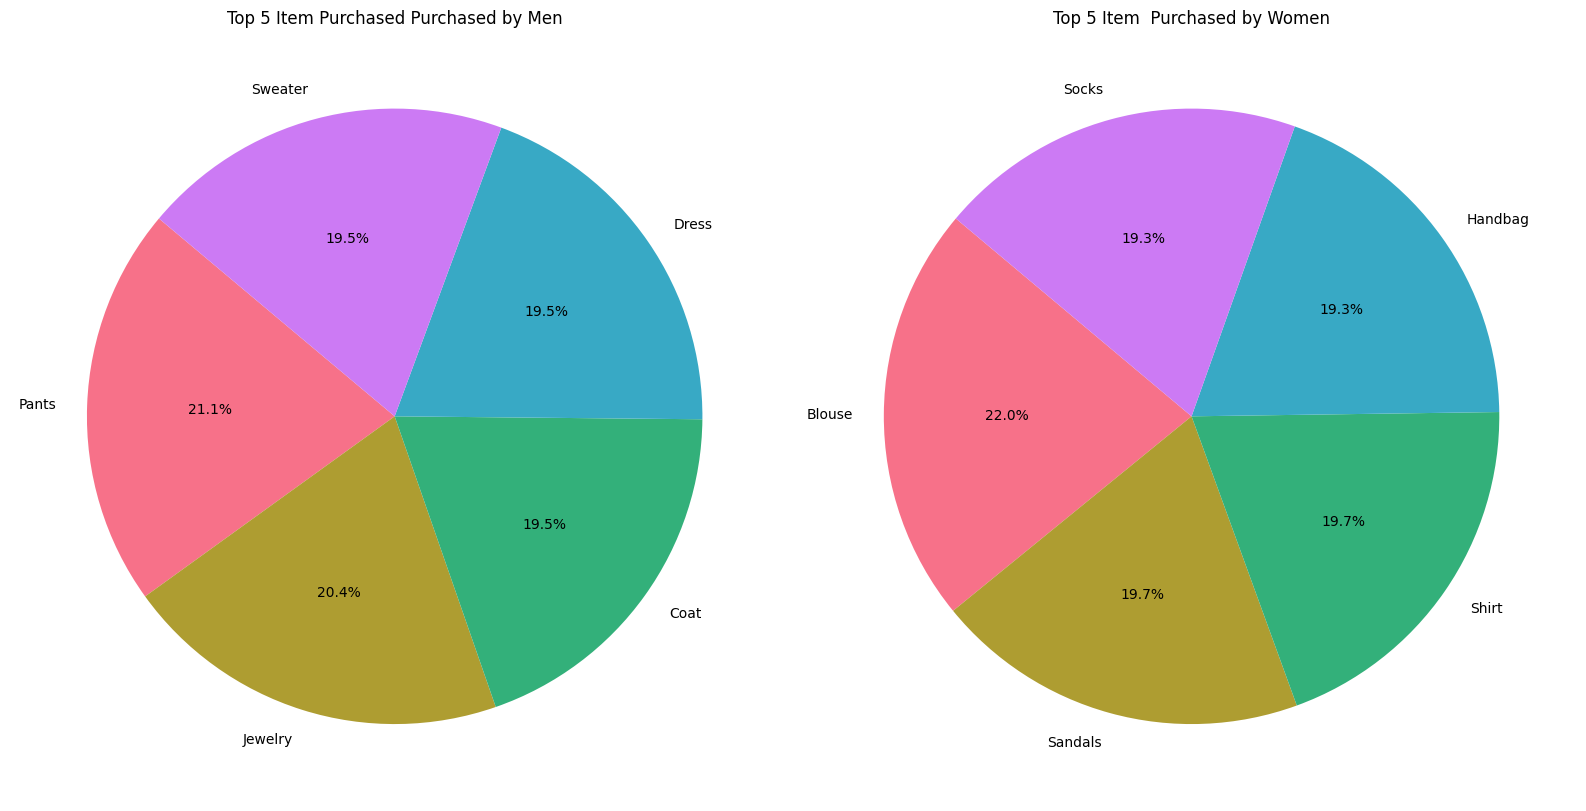

In [29]:

df = pd.DataFrame(data)

top_n = 5
color_counts = df.groupby(['Gender', 'Item Purchased']).size().reset_index(name='count')
top_colors_men = color_counts[color_counts['Gender'] == 'Male'].nlargest(top_n, 'count')
top_colors_women = color_counts[color_counts['Gender'] == 'Female'].nlargest(top_n, 'count')

fig, axs = plt.subplots(1, 2, figsize=(16, 8))
colors_palette = sns.color_palette("husl", top_n)  

axs[0].pie(top_colors_men['count'], labels=top_colors_men['Item Purchased'], autopct='%1.1f%%', startangle=140, colors=colors_palette)
axs[0].set_title('Top 5 Item Purchased Purchased by Men')

axs[1].pie(top_colors_women['count'], labels=top_colors_women['Item Purchased'], autopct='%1.1f%%', startangle=140, colors=colors_palette)
axs[1].set_title('Top 5 Item  Purchased by Women')
plt.tight_layout()
plt.show()

Men: The top 5 items purchased by men are Sweater, Dress, Pants, Coat, and Jewelry. Sweater is the most popular item, followed by Dress and Pants.
Women: The top 5 items purchased by women are Socks, Blouse, Handbag, Coat, and Shirt. Socks is the most popular item, followed by Blouse and Handbag.

C:\Users\acer\AppData\Local\Temp\ipykernel_8224\252008840.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Subscription Status', data=df, palette='Set2', ax=axs[1])


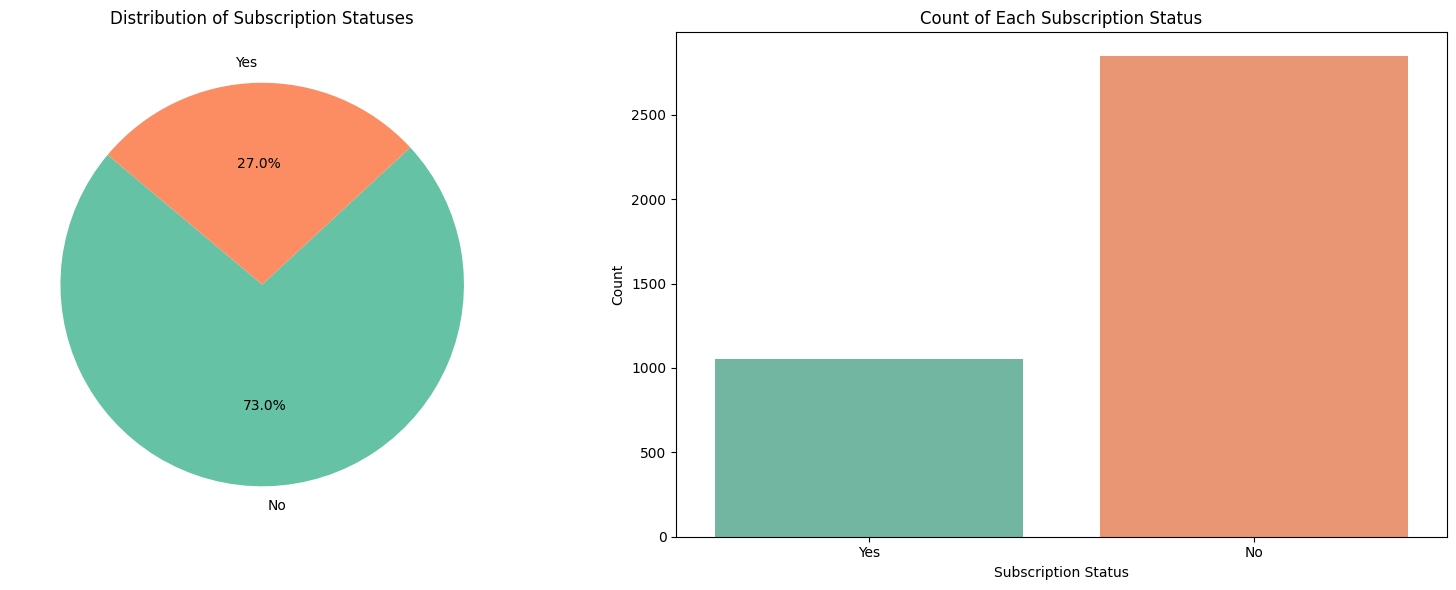

In [20]:
df = pd.DataFrame(data)

status_counts = df['Subscription Status'].value_counts()
status_labels = status_counts.index
status_sizes = status_counts.values
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

axs[0].pie(status_sizes, labels=status_labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2', len(status_labels)))
axs[0].set_title('Distribution of Subscription Statuses')

sns.countplot(x='Subscription Status', data=df, palette='Set2', ax=axs[1])
axs[1].set_title('Count of Each Subscription Status')
axs[1].set_xlabel('Subscription Status')
axs[1].set_ylabel('Count')
plt.tight_layout()
plt.show()


Distribution of Subscription Statuses: 73% of respondents answered "No" to the subscription question, while 27% answered "Yes."
Count of Each Subscription Status: 2500 individuals did not subscribe, while 1000 individuals did subscribe.

C:\Users\acer\AppData\Local\Temp\ipykernel_8224\3404619271.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=shipping_counts.index, y=shipping_counts.values, palette='viridis')


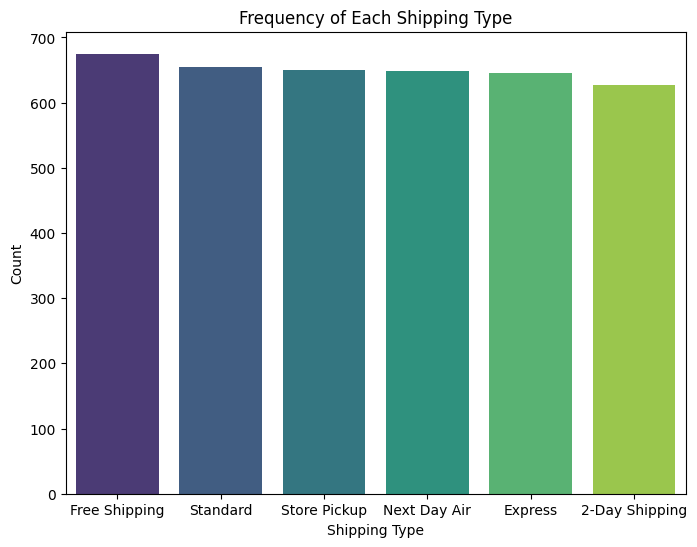

In [22]:
df = pd.DataFrame(data)

shipping_counts = df['Shipping Type'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=shipping_counts.index, y=shipping_counts.values, palette='viridis')
plt.title('Frequency of Each Shipping Type')
plt.xlabel('Shipping Type')
plt.ylabel('Count')
plt.show()

Free Shipping: Free Shipping is the most popular shipping type, with a count of approximately 675.
Standard, Store Pickup, Next Day Air, Express, and 2-Day Shipping: These shipping types have similar frequencies, ranging from approximately 625 to 650.

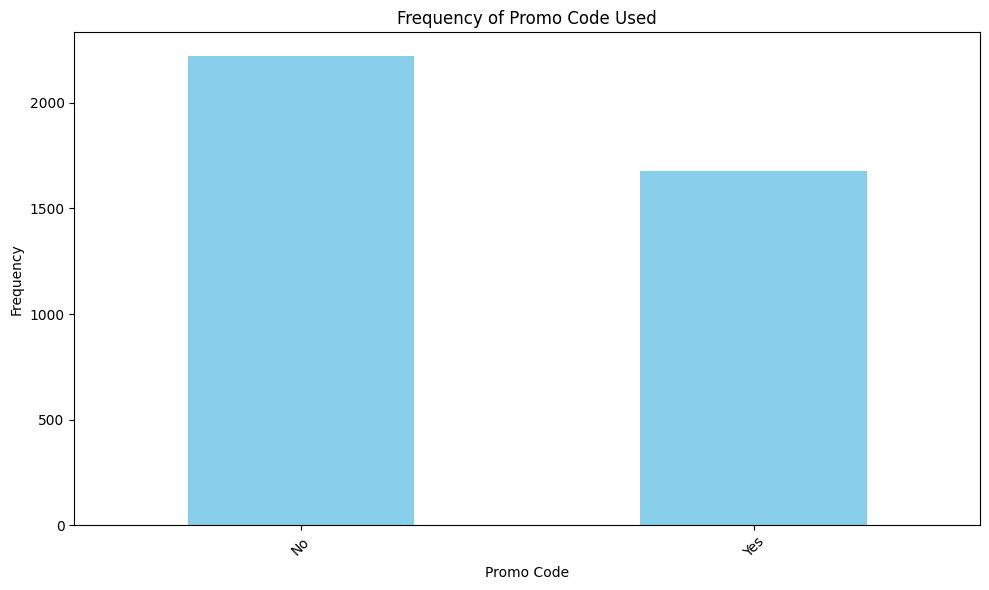

In [24]:
promo_code_counts = df['Promo Code Used'].value_counts()
plt.figure(figsize=(10, 6))
promo_code_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Promo Code')
plt.ylabel('Frequency')
plt.title('Frequency of Promo Code Used')
plt.xticks(rotation=45)
plt.tight_layout()  
plt.show()


No Promo Code: A larger number of respondents indicated that they did not use a promo code.
Promo Code: A smaller number of respondents indicated that they did use a promo code.

C:\Users\acer\AppData\Local\Temp\ipykernel_8224\3335870073.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_method_counts.index, y=payment_method_counts.values, palette='viridis')


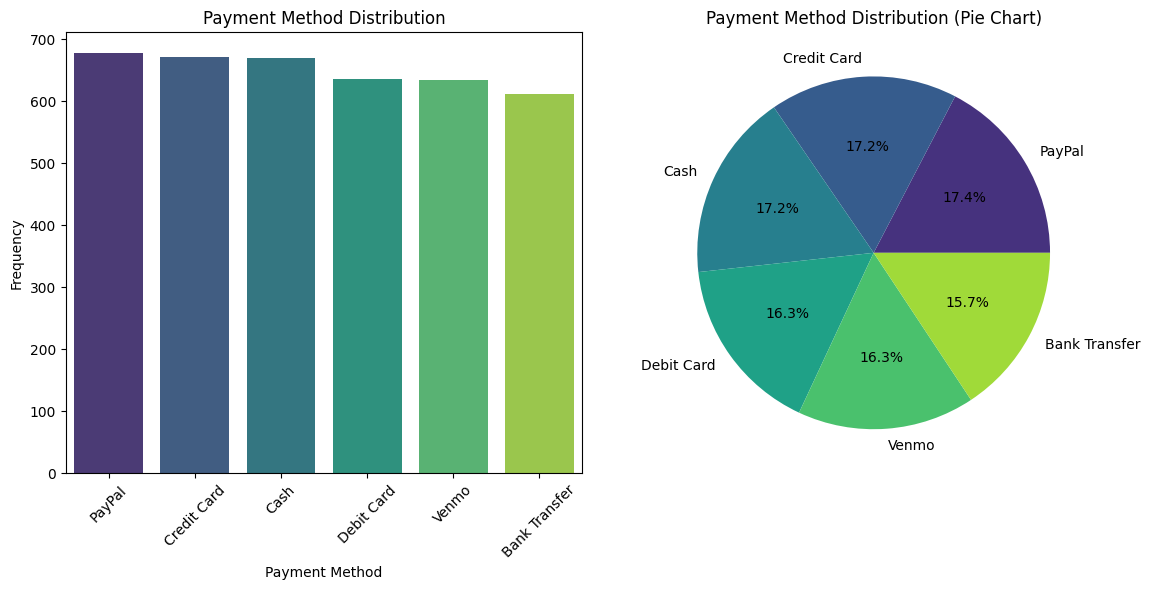

In [28]:
payment_method_counts = df['Payment Method'].value_counts()
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1) 
sns.barplot(x=payment_method_counts.index, y=payment_method_counts.values, palette='viridis')
plt.xlabel('Payment Method')
plt.ylabel('Frequency')
plt.title('Payment Method Distribution')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)  
plt.pie(payment_method_counts, labels=payment_method_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis', len(payment_method_counts)))
plt.title('Payment Method Distribution (Pie Chart)')
plt.tight_layout()
plt.show()

PayPal is the most popular payment method, followed by Credit Card, Cash, Debit Card, and Venmo. Bank Transfer is the least popular payment method.

In [133]:

bins = [10, 20, 40, 60, float('inf')]
labels = ['10-20', '20-40', '40-60', '60+']
df['Age Bin'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

binned_data = df.groupby(['Age Bin', 'Gender'])['Purchase Amount (USD)'].mean().reset_index()
fig = px.line(
    binned_data, 
    x='Age Bin', 
    y='Purchase Amount (USD)', 
    color='Gender', 
    line_shape='linear', 
    title='Average Purchase Amount by Age Bin and Gender',
    markers=True  
)

fig.update_layout(
    xaxis_title='Age Bin',
    yaxis_title='Average Purchase Amount (USD)',
    title_font_size=20,
    xaxis=dict(
        tickmode='array',  
        tickvals=labels,  
        ticktext=labels   
    ),
    yaxis=dict(
        tickformat='$'
    ),
    legend_title_text='Gender', 
    hovermode='x unified'  
)

fig.show()

C:\Users\acer\AppData\Local\Temp\ipykernel_8224\68152901.py:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Age 10-20: Female shoppers have a slightly higher average purchase amount than male shoppers.
Age 20-40: Both male and female shoppers have a similar average purchase amount.
Age 40-60: Male shoppers have a significantly higher average purchase amount than female shoppers.
Age 60+: Female shoppers have a significantly higher average purchase amount than male shoppers.

In [68]:

data['Purchase Amount (USD)'] = pd.to_numeric(data['Purchase Amount (USD)'], errors='coerce')
binned_data = data.groupby('Gender')['Purchase Amount (USD)'].sum().reset_index()

fig = px.bar(
    binned_data,
    x='Gender',
    y='Purchase Amount (USD)',
    title='Total Purchase Amount by Gender',
    labels={
        'Gender': 'Gender',
        'Purchase Amount (USD)': 'Total Purchase Amount (USD)'
    },
    color_discrete_sequence=['#003366']  
)

fig.update_layout(
    xaxis_title='Gender',
    yaxis_title='Total Purchase Amount (USD)',
    title_font_size=20,
    yaxis=dict(
        tickformat='$'  
    )
)

fig.show()

Total Purchase Amount: Male shoppers have a significantly higher total purchase amount compared to female shoppers.

In [67]:

data['Purchase Amount (USD)'] = pd.to_numeric(data['Purchase Amount (USD)'], errors='coerce')
binned_data = data.groupby('Category')['Purchase Amount (USD)'].sum().reset_index()

binned_data = binned_data.sort_values(by='Purchase Amount (USD)', ascending=False)
color_sequence = ['#67000d', '#a50f15', '#de2d26', '#fb6a4a', '#fcae91']

fig = px.bar(
    binned_data,
    x='Category',
    y='Purchase Amount (USD)',
    title='Total Purchase Amount by Category',
    labels={
        'Category': 'Category',
        'Purchase Amount (USD)': 'Total Purchase Amount (USD)'
    },
    color='Category',  
    color_discrete_sequence=color_sequence  
)

fig.update_layout(
    xaxis_title='Category',
    yaxis_title='Total Purchase Amount (USD)',
    title_font_size=20,
    yaxis=dict(
        tickformat='$'  
    ),
    xaxis_tickangle=-45  
)

fig.show()


Total Purchase Amount: Clothing is the category with the highest total purchase amount, followed by Accessories and Footwear. Outerwear has the lowest total purchase amount.

In [99]:
df['Purchase Amount (USD)'] = pd.to_numeric(df['Purchase Amount (USD)'], errors='coerce')

binned_data = df.groupby('Shipping Type')['Purchase Amount (USD)'].sum().reset_index()
binned_data = binned_data.sort_values(by='Purchase Amount (USD)', ascending=False)
color_scale = ['#74c476', '#41ab5d', '#238b45', '#006d2c', '#00441b']

fig = px.bar(
    binned_data,
    x='Shipping Type',
    y='Purchase Amount (USD)',
    title='Total Purchase Amount by Shipping Type',
    labels={
        'Shipping Type': 'Shipping Type',
        'Purchase Amount (USD)': 'Total Purchase Amount (USD)'
    },
    color='Purchase Amount (USD)',  
    color_continuous_scale=color_scale  
)

fig.update_layout(
    xaxis_title='Shipping Type',
    yaxis_title='Total Purchase Amount (USD)',
    title_font_size=20,
    yaxis=dict(
        tickformat='$'  
    ),
    xaxis_tickangle=-45  
)

fig.show()


Total Purchase Amount: Free Shipping has the highest total purchase amount, followed closely by Express, Store Pickup, Standard, 2-Day Shipping, and Next Day Air.

In [135]:

data['Purchase Amount (USD)'] = pd.to_numeric(data['Purchase Amount (USD)'], errors='coerce')

binned_data = data.groupby('Location')['Purchase Amount (USD)'].sum().reset_index()

binned_data = binned_data.sort_values(by='Purchase Amount (USD)', ascending=False)
top_10_binned_data = binned_data.head(10)
color_scale = ['#e0b3f1', '#d68cf1', '#b85ef6', '#8a2be2', '#4b0082']

fig = px.bar(
    top_10_binned_data,
    x='Location',
    y='Purchase Amount (USD)',
    title='Top 10 Locations by Total Purchase Amount',
    labels={
        'Location': 'Location',
        'Purchase Amount (USD)': 'Total Purchase Amount (USD)'
    },
    color='Purchase Amount (USD)',  
    color_continuous_scale=color_scale  
)

fig.update_layout(
    xaxis_title='Location',
    yaxis_title='Total Purchase Amount (USD)',
    title_font_size=20,
    yaxis=dict(
        tickformat='$'  
    ),
    xaxis_tickangle=-45  
)

fig.show()


Total Purchase Amount: Montana has the highest total purchase amount, followed by Illinois, California, Idaho, and Nevada. Nebraska has the lowest total purchase amount among the top 10 locations

In [26]:

grouped_df = df.groupby('Item Purchased')['Purchase Amount (USD)'].sum().reset_index()
top_items = grouped_df.sort_values(by='Purchase Amount (USD)', ascending=False).head(10)

items = top_items['Item Purchased']
purchase_amounts = top_items['Purchase Amount (USD)']

fig = go.Figure(data=[go.Bar(
    x=items,
    y=purchase_amounts,
    marker_color='darkgoldenrod'  
)])


fig.update_layout(
    title='Top 10 Items by Purchase Amount',
    xaxis_title='Item Purchased',
    yaxis_title='Purchase Amount (USD)',
    xaxis=dict(
        title_text='Item Purchased',
        title_font=dict(size=14, color='black'),
        tickangle=-45
    ),
    yaxis=dict(
        title_text='Purchase Amount (USD)',
        title_font=dict(size=14, color='black')
    ),
    plot_bgcolor='white',
    paper_bgcolor='white'
)

fig.show()

Purchase Amount (USD): The purchase amounts for all top 10 items are relatively close, ranging from approximately 8k to 10k USD.
Item Purchased: The top 10 items include a variety of clothing items, such as blouses, shirts, dresses, pants, jewelry, sunglasses, belts, skirts, sweaters, and shorts.

In [124]:

df = pd.DataFrame(data)

aggregated_df = df.groupby('Frequency of Purchases').agg(
    Total_Purchase_Amount=('Purchase Amount (USD)', 'sum')
).reset_index()

aggregated_df = aggregated_df.sort_values(by='Total_Purchase_Amount', ascending=False)

fig = px.bar(
    aggregated_df,
    x='Frequency of Purchases',
    y='Total_Purchase_Amount',
    title='Total Purchase Amount (USD) by Frequency of Purchases',
    labels={'Frequency of Purchases': 'Frequency of Purchases', 'Total_Purchase_Amount': 'Total Purchase Amount (USD)'},
    color='Total_Purchase_Amount',  
    color_continuous_scale=px.colors.sequential.Blues 
)

fig.update_layout(
    xaxis_title='Frequency of Purchases',
    yaxis_title='Total Purchase Amount (USD)',
    title_font_size=20,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14
)

fig.show()

Total Purchase Amount: Customers who purchase every 3 months have the highest total purchase amount, followed by annually, quarterly, bi-weekly, monthly, fortnightly, and weekly purchasers.

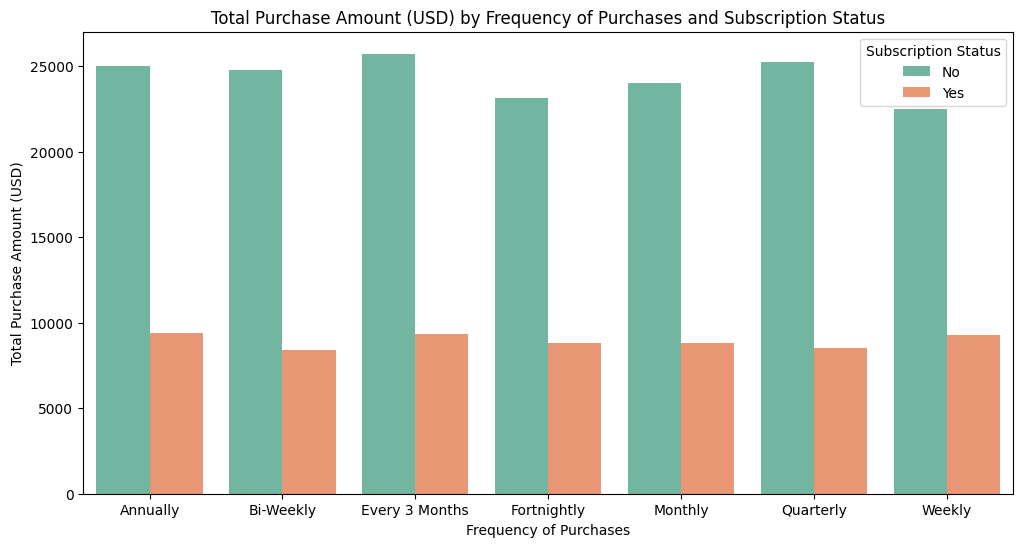

In [117]:
total_purchase_df = df.groupby(['Frequency of Purchases', 'Subscription Status']).agg(
    Total_Purchase_Amount=('Purchase Amount (USD)', 'sum')
).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=total_purchase_df, x='Frequency of Purchases', y='Total_Purchase_Amount', hue='Subscription Status', palette='Set2')
plt.title('Total Purchase Amount (USD) by Frequency of Purchases and Subscription Status')
plt.xlabel('Frequency of Purchases')
plt.ylabel('Total Purchase Amount (USD)')
plt.legend(title='Subscription Status')
plt.show()

Frequency of Purchases: Customers who purchase every 3 months tend to have the highest total purchase amount, followed by annually, bi-weekly, monthly, quarterly, fortnightly, and weekly purchasers.
Subscription Status: Subscribers generally have higher total purchase amounts compared to non-subscribers, across all purchase frequencies.
Interaction: The combination of frequent purchases and subscription status seems to have the highest impact on total purchase amount. Customers who subscribe and purchase every 3 months have the highest total purchase amount.

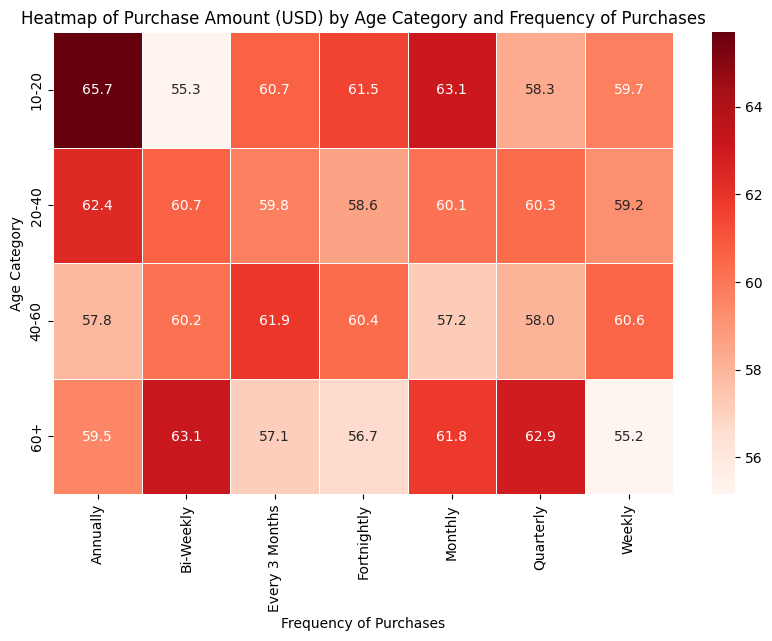

In [5]:
bins = [10, 20, 40, 60, 100]  
labels = ['10-20', '20-40', '40-60', '60+']  
df['Age Category'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

pivot_df = df.pivot_table(
    index='Age Category',  
    columns='Frequency of Purchases',  
    values='Purchase Amount (USD)',  
    aggfunc='mean'  
)

plt.figure(figsize=(10, 6))
sns.heatmap(
    pivot_df,
    cmap='Reds', 
    annot=True,
    fmt='.1f',
    linewidths=.5
)
plt.title('Heatmap of Purchase Amount (USD) by Age Category and Frequency of Purchases')
plt.xlabel('Frequency of Purchases')
plt.ylabel('Age Category')
plt.show()

Age Category: The highest average purchase amounts are generally found in the 10-20 age group, followed by the 20-40 age group. The 40-60 and 60+ age groups have more varied purchase amounts.
Frequency of Purchases: Customers who purchase every 3 months tend to have higher average purchase amounts, regardless of age category. However, there are exceptions, especially for the 40-60 age group.
Interaction: The combination of age category and purchase frequency can influence the purchase amount. For example, younger customers (10-20) who purchase every 3 months tend to have the highest average purchase amounts.

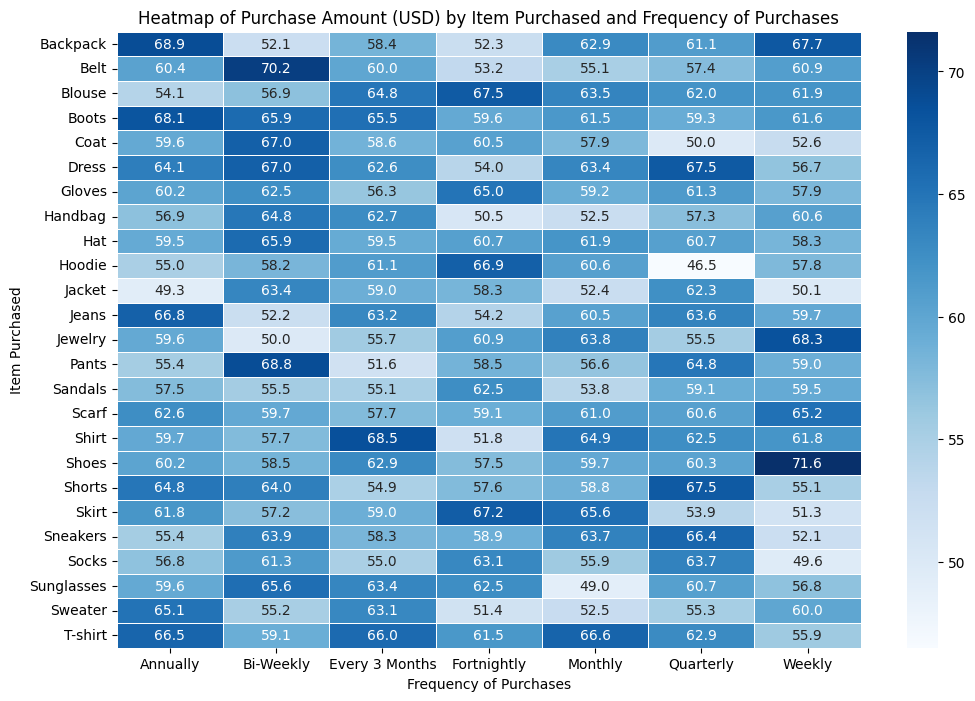

In [9]:
pivot_df = df.pivot_table(
    index='Item Purchased',  
    columns='Frequency of Purchases',  
    values='Purchase Amount (USD)',  
    aggfunc='mean' 
)

plt.figure(figsize=(12, 8))
sns.heatmap(
    pivot_df,
    cmap='Blues', 
    annot=True,
    fmt='.1f',
    linewidths=.5
)
plt.title('Heatmap of Purchase Amount (USD) by Item Purchased and Frequency of Purchases')
plt.xlabel('Frequency of Purchases')
plt.ylabel('Item Purchased')
plt.show()

There is a wide range of average purchase amounts across different items. Items like Backpacks, Boots, Coats, Dresses, and Gloves generally have higher average purchase amounts compared to items like Pants, Sandals, Shorts, and Socks.Shirts and Sneakers have higher average purchase amounts when purchased weekly or bi-weekly.

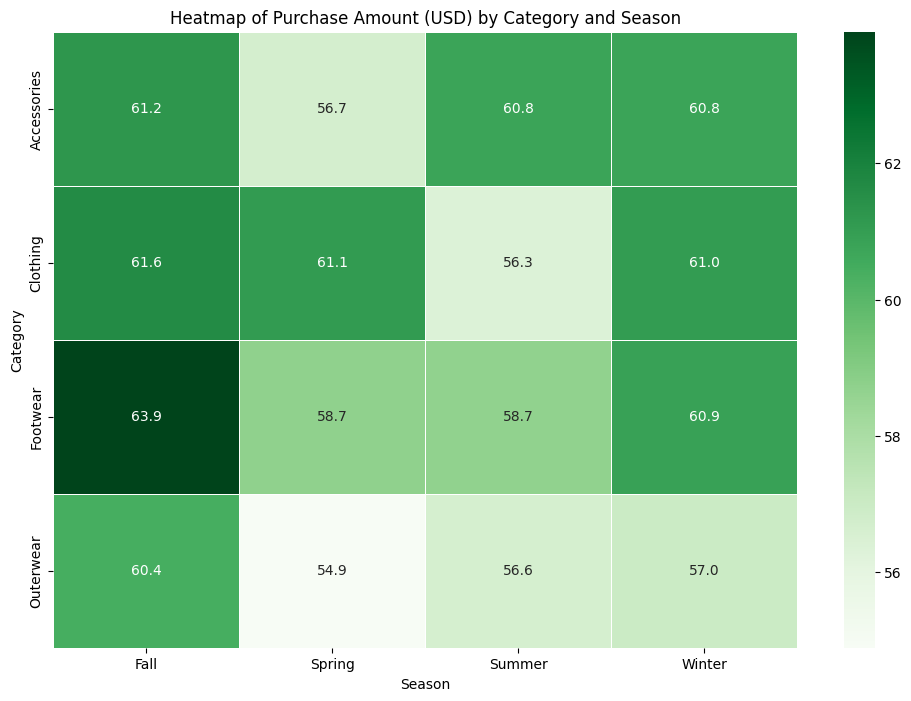

In [131]:
aggregated_df = df.groupby(['Item Purchased', 'Season', 'Category']).agg(
    Total_Purchase_Amount=('Purchase Amount (USD)', 'mean')
).reset_index()

pivot_df = aggregated_df.pivot_table(
    index='Category',  
    columns='Season',  
    values='Total_Purchase_Amount', 
    aggfunc='mean'  
)

plt.figure(figsize=(12, 8))
sns.heatmap(
    pivot_df,
    cmap='Greens',  
    annot=True,
    fmt='.1f',
    linewidths=.5
)
plt.title('Heatmap of Purchase Amount (USD) by Category and Season')
plt.xlabel('Season')
plt.ylabel('Category')
plt.show()

Category: Clothing and Footwear have the highest average purchase amounts across all seasons. Outerwear has the lowest average purchase amount across all seasons. Accessories have a relatively consistent average purchase amount across all seasons.
Season: Winter and Fall tend to have higher average purchase amounts compared to Spring and Summer, especially for Clothing and Footwear. Outerwear has the highest average purchase amount in Winter and the lowest average purchase amount in Summer.

Based on the detailed analysis provided, here is a comprehensive conclusion:

### Summary of Insights:

1. **Review Ratings**:
   - The most common review rating bin is 4.0 to 4.5, with a count of 2.00. 
   - The second most frequent bins are 3.5 to 4.0 and 4.5 to 5.0, both with a count of 1.75. 
   - The least frequent bin is 2.5 to 3.0, with a count of 1.00.
   - Overall, reviews are skewed towards higher ratings, with a substantial portion falling in the 3.5 to 5.0 range.

2. **Location**:
   - Montana leads in the number of individuals, followed by West Virginia and Alabama.
   - Gender distribution is balanced across locations, showing no significant gender bias.

3. **Product Categories**:
   - **Clothing** is the most popular product category, followed by **Accessories**. 
   - **Footwear** and **Outerwear** have considerably lower purchase counts compared to Clothing and Accessories.
   - **Clothing** dominates both in purchase counts and total purchase amount.

4. **Gender Differences**:
   - Males show a preference for Clothing and Footwear, while females lean towards Accessories.
   - Outerwear is relatively neutral in gender preference.
   - Males also favor larger sizes, such as Medium and Large, while females prefer Small and XLarge sizes.
   - Color preferences vary by gender: Males prefer Silver and Yellow, whereas females prefer Green and Magenta.

5. **Seasonality**:
   - **Winter** is the most popular season for purchases, followed by Spring and Fall. Summer has the lowest purchase count.
   - Males show a higher preference for Winter and Fall, while females lean towards Spring and Summer.

6. **Purchase Frequency**:
   - The most frequent purchase intervals are Weekly, Fortnightly, and Annually.
   - Males tend to purchase more frequently, particularly Weekly and Fortnightly, while females prefer Annually and Quarterly.

7. **Shipping Preferences**:
   - **Standard** shipping is the most common, followed by **Express**.
   - Free Shipping and Store Pickup are more popular among females, while males prefer Standard and Express shipping options.

8. **Subscription Status**:
   - A significant majority (73%) of individuals do not subscribe, while 27% do.
   - Subscribers generally have higher total purchase amounts, particularly those purchasing every three months.

9. **Payment Methods**:
   - **PayPal** is the most popular payment method, followed by Credit Card, Cash, Debit Card, and Venmo.
   - **Bank Transfer** is the least favored method.

10. **Age and Purchase Behavior**:
    - **Younger** shoppers (ages 10-20) tend to spend more on average compared to older age groups, but the trend varies by age group and purchase frequency.
    - Customers in the 40-60 age range have a higher total purchase amount, especially when purchasing every three months.

11. **Overall Purchase Amounts**:
    - **Clothing** generates the highest total purchase amount, with significant contributions from **Accessories** and **Footwear**.
    - **Free Shipping** also sees the highest total purchase amount, followed by Express and Standard shipping.

12. **Item-Specific Insights**:
    - **Backpacks, Boots, Coats, Dresses, and Gloves** generally have higher average purchase amounts.
    - **Shirts and Sneakers** have higher average purchase amounts when bought on a weekly or bi-weekly basis.
    - **Outerwear** shows the lowest average purchase amount across all seasons, with notable peaks in Winter and declines in Summer.

### Conclusion:

The data reveals a clear preference for higher-rated reviews, with a skew towards positive feedback. In terms of purchasing patterns, Clothing is the dominant category across various metrics, with significant gender differences in product preferences and sizes. Seasonal trends show Winter as the peak period for purchases, while Summer lags behind. The frequency of purchases varies, with a notable inclination towards more frequent buying among males and a preference for longer intervals among females. Shipping preferences and payment methods also vary, with Standard shipping and PayPal being the most popular choices. Age plays a role in purchase behavior, with younger and older demographics exhibiting different spending patterns. Overall, the combination of purchase frequency, subscription status, and product category significantly influences total purchase amounts, with frequent, subscribed customers showing the highest spending.

### THANK YOU